In [1]:
# Question 8: Clustering Text Data
# Description: Apply K-Means clustering to a set of text documents (e.g., news articles) after using TF-IDF for feature extraction.

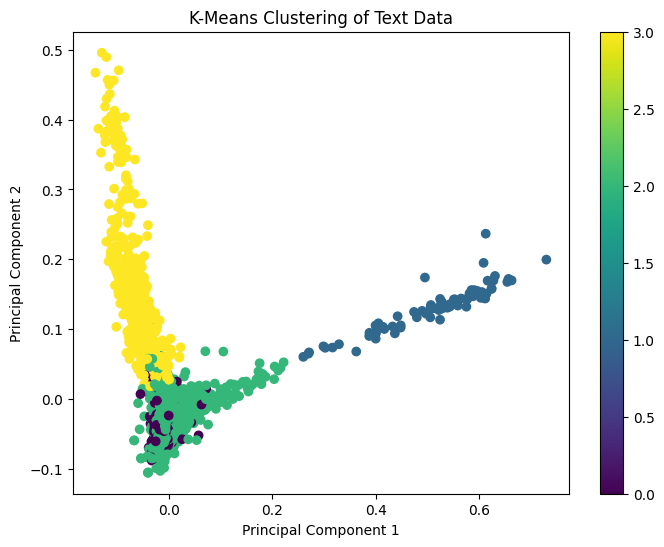

Cluster 0 Top Words:
car com edu cars engine article writes oil just don


Cluster 1 Top Words:
pitt geb banks gordon cs edu dsl cadre shameful n3jxp


Cluster 2 Top Words:
edu com university graphics posting host nntp know thanks article


Cluster 3 Top Words:
space nasa henry edu access digex gov toronto pat alaska




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups

# Load a subset of the 20 newsgroups dataset for text clustering
newsgroups = fetch_20newsgroups(subset='all', categories=['sci.med', 'sci.space', 'rec.autos', 'comp.graphics'])

# TF-IDF feature extraction
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X = vectorizer.fit_transform(newsgroups.data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters by plotting first two dimensions using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_kmeans, cmap='viridis', marker='o')
plt.title('K-Means Clustering of Text Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Show the most common words in each cluster
terms = vectorizer.get_feature_names_out()
n_top_words = 10
for i in range(4):  # We have 4 clusters
    print(f"Cluster {i} Top Words:")
    cluster_center = kmeans.cluster_centers_[i]
    top_terms_idx = cluster_center.argsort()[-n_top_words:][::-1]
    top_terms = [terms[idx] for idx in top_terms_idx]
    print(" ".join(top_terms))
    print("\n")

